<a href="https://colab.research.google.com/github/sushii-00/Handwritten-Character-Recognition/blob/main/Handwritten_character_recognition_using_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###These are the first 4 images of our training set

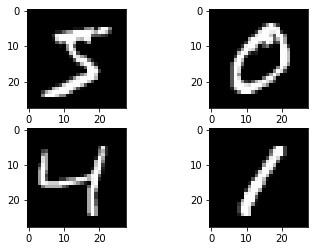

In [ ]:
#plot ad hoc mnist instances

from keras.datasets import mnist
import matplotlib.pyplot as plt

#load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#plot 4 images ad gray scale
plt.subplot(221)
plt.imshow(X_train[0] , cmap=plt.get_cmap('gray'))

plt.subplot(222)
plt.imshow(X_train[1] , cmap=plt.get_cmap('gray'))

plt.subplot(223)
plt.imshow(X_train[2] , cmap=plt.get_cmap('gray'))

plt.subplot(224)
plt.imshow(X_train[3] , cmap=plt.get_cmap('gray'))

#show the plot 
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils


In [ ]:
#load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

The training dataset is structured as a 3-dimensional array of instance, image width and image height. For a multi-layer perceptron model we must reduce the images down into a vector of pixels. In this case the 28×28 sized images will be 784 pixel input values.

We can do this transform easily using the reshape() function on the NumPy array. We can also reduce our memory requirements by forcing the precision of the pixel values to be 32 bit, the default precision used by Keras anyway.

In [ ]:
#flatten 28*28 images to a 784 vector for each image

num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0],num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0],num_pixels)).astype('float32')

The pixel values are gray scale between 0 and 255. It is almost always a good idea to perform some scaling of input values when using neural network models. Because the scale is well known and well behaved, we can very quickly normalize the pixel values to the range 0 and 1 by dividing each value by the maximum of 255.

In [ ]:
#normalise inputs from 0-255 to 0-1

X_train = X_train/255

X_test = X_test/255

Finally, the output variable is an integer from 0 to 9. This is a multi-class classification problem. As such, it is good practice to use a one hot encoding of the class values, transforming the vector of class integers into a binary matrix.

We can easily do this using the built-in np_utils.to_categorical() helper function in Keras.

In [ ]:
#One- hot encoding the outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

We are now ready to create our simple neural network model. We will define our model in a function. This is handy if you want to extend the example later and try and get a better score.

In [ ]:
#define baseline model
def baseline_model():
  #create model
  model = Sequential()
  model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer = 'normal', activation= 'relu'))
  model.add(Dense(num_classes, kernel_initializer='normal', activation = 'softmax'))

  #compile model
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics= ['accuracy'])
  return model

The model is a simple neural network with one hidden layer with the same number of neurons as there are inputs (784). A rectifier activation function is used for the neurons in the hidden layer.

A softmax activation function is used on the output layer to turn the outputs into probability-like values and allow one class of the 10 to be selected as the model’s output prediction. Logarithmic loss is used as the loss function (called categorical_crossentropy in Keras) and the efficient ADAM gradient descent algorithm is used to learn the weights.

We can now fit and evaluate the model. The model is fit over 10 epochs with updates every 200 images. The test data is used as the validation dataset, allowing you to see the skill of the model as it trains. A verbose value of 2 is used to reduce the output to one line for each training epoch.

Finally, the test dataset is used to evaluate the model and a classification error rate is printed.

In [ ]:
#build the model
model = baseline_model()
#fit the model
model.fit(X_train, y_train,validation_data = (X_test, y_test), epochs = 10, batch_size=200, verbose =2)

#final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
#print("Baseline Error: %.2f%%" %(100-scores[1]*100))

Epoch 1/10
300/300 - 9s - loss: 0.2138 - accuracy: 0.9369 - val_loss: 0.1052 - val_accuracy: 0.9679
Epoch 2/10
300/300 - 9s - loss: 0.0741 - accuracy: 0.9766 - val_loss: 0.0719 - val_accuracy: 0.9777
Epoch 3/10
300/300 - 9s - loss: 0.0441 - accuracy: 0.9854 - val_loss: 0.0649 - val_accuracy: 0.9787
Epoch 4/10
300/300 - 9s - loss: 0.0296 - accuracy: 0.9904 - val_loss: 0.0793 - val_accuracy: 0.9751
Epoch 5/10
300/300 - 9s - loss: 0.0209 - accuracy: 0.9934 - val_loss: 0.0723 - val_accuracy: 0.9799
Epoch 6/10
300/300 - 9s - loss: 0.0158 - accuracy: 0.9952 - val_loss: 0.0794 - val_accuracy: 0.9796
Epoch 7/10
300/300 - 8s - loss: 0.0154 - accuracy: 0.9947 - val_loss: 0.0975 - val_accuracy: 0.9733
Epoch 8/10
300/300 - 9s - loss: 0.0158 - accuracy: 0.9946 - val_loss: 0.0776 - val_accuracy: 0.9799
Epoch 9/10
300/300 - 9s - loss: 0.0135 - accuracy: 0.9955 - val_loss: 0.0939 - val_accuracy: 0.9779
Epoch 10/10
300/300 - 9s - loss: 0.0148 - accuracy: 0.9951 - val_loss: 0.0921 - val_accuracy: 0.9785

In [ ]:
print("Baseline Error: %.2f%%" %(100-scores[1]*100))

Baseline Error: 2.15%


* epochs = 10, batch_size= 200 => error = 1.73%
* increasing epochs doesn't affect the accuracy
* decreasing the batch_size=100 => error = 1.82%
* increasing the hidden layers to 2 layers => error=2.15%